In [1]:
import ast
import json
import pandas as pd

In [71]:
filename = "results/dt_shuttle_equally.json" 
with open(filename) as fp:
    data = fp.read()
    
d1 = ast.literal_eval(data)
print(d1)

{'1': {'344': {'total': 28, 'tp': 25}, '0': {'total': 28, 'tp': 24}, '346': {'total': 28, 'tp': 26}, '347': {'total': 28, 'tp': 26}, '340': {'total': 28, 'tp': 25}, '341': {'total': 28, 'tp': 25}, '342': {'total': 28, 'tp': 25}, '343': {'total': 28, 'tp': 25}, '810': {'total': 28, 'tp': 26}, '811': {'total': 28, 'tp': 26}, '812': {'total': 28, 'tp': 26}, '813': {'total': 28, 'tp': 26}, '348': {'total': 28, 'tp': 26}, '349': {'total': 28, 'tp': 26}, '816': {'total': 28, 'tp': 26}, '817': {'total': 28, 'tp': 26}, '595': {'total': 28, 'tp': 25}, '719': {'total': 28, 'tp': 25}, '718': {'total': 28, 'tp': 25}, '717': {'total': 28, 'tp': 25}, '716': {'total': 28, 'tp': 25}, '715': {'total': 28, 'tp': 25}, '714': {'total': 28, 'tp': 25}, '713': {'total': 28, 'tp': 25}, '712': {'total': 28, 'tp': 25}, '711': {'total': 28, 'tp': 25}, '710': {'total': 28, 'tp': 25}, '915': {'total': 28, 'tp': 26}, '914': {'total': 28, 'tp': 23}, '606': {'total': 28, 'tp': 28}, '917': {'total': 28, 'tp': 26}, '59

In [72]:
labels = []
gens = []
accs = []

for label,v in d1.items():
    for gen, v1 in d1[label].items():
        if (int(gen)+1)%50 == 0:
            total = d1[label][gen].get("total")
            tp = d1[label][gen].get("tp")
            if not tp:
                tp = 0
            acc = round(float(tp)/float(total), 4)
            labels.append(label)
            gens.append(int(gen)+1)
            accs.append(acc)

df = pd.DataFrame({"Label": labels, "Generations": gens, "Classification Accuracy": accs})

In [73]:
df = df.sort_values(by=['Label', 'Generations'])
df.head()

,Classification Accuracy,Generations,Label
19,0.7143,50,1
5,0.9286,100,1
6,0.6786,150,1
2,0.7143,200,1
9,0.9643,250,1


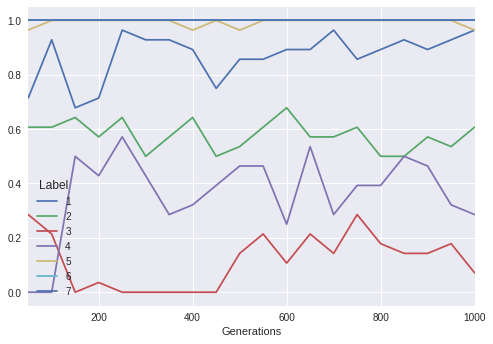

In [74]:
df = df.pivot(index='Generations', columns='Label', values='Classification Accuracy')
df.plot()
plt.savefig(filename.rstrip(".json")+'.png', dpi=300)
plt.show()

In [36]:
import seaborn as sns

ax = sns.lineplot(x="Generations", y="Training Accuracy", data=label1_df)
ax.set(xlabel='Generations', ylabel='Training Accuracy')
# save_plot("event_detection_time_by_varying_time_slice_duration", plt)
plt.show()

AttributeError: 'module' object has no attribute 'lineplot'